In [177]:
import time, enum, math
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model
from mesa.time import SimultaneousActivation, RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner
from networkx.algorithms.shortest_paths.generic import has_path
import networkx as nx
import random
import pickle
import csv
from tqdm import tqdm, trange
from time import sleep
from collections import Counter

data_path = 'data/'


# with open((data_path + 'batch_out.pickle'), 'rb') as handle:
#     batch_out = pickle.load(handle)

 
# with open(( data_path + 'batch_keys.csv')) as f:
#     batch_keys=[tuple(line) for line in csv.reader(f)]


# agent_state.to_csv((data_path + 'single_run_output.csv'), header = True)
ports_df = pd.read_csv(data_path + 'ports.csv')
ports_df["coords"] = ports_df["coords"].apply(lambda x: eval(x)[0])
ports_df["x"] = ports_df["coords"].apply(lambda x: x[0])
ports_df["y"] = ports_df["coords"].apply(lambda x: x[1])

In [179]:
ports_df.head()

,Unnamed: 0,PORT_NAME,INDEX_NO,coords,x,y
0,49159,Terminal Pesquero Cta. Quiane,NaN,"(-70.31722387298942, -18.513597026467323)",-70.317224,-18.513597
1,49164,Oil Berth,NaN,"(-61.86886473007713, 17.150384410999997)",-61.868865,17.150384
2,16,Port of Basamuk,NaN,"(146.14295817405977, -5.53913255687803)",146.142958,-5.539133
3,26,Victoria,NaN,"(-123.32715191091728, 48.402783083729446)",-123.327152,48.402783
4,34,NaN,NaN,"(126.50786074843957, 36.333661512471735)",126.507861,36.333662


# Single Run Analysis

In [125]:
single_run_none = pd.read_csv(data_path + 'open_single_run_out.csv')
single_run_none = single_run_none[:45000]
single_run_suez = pd.read_csv(data_path + 'Suez_single_run_output.csv')
single_run_hormuz = pd.read_csv(data_path + 'Hormuz_single_run_output.csv')
single_run_malacca = pd.read_csv(data_path + 'Malacca_single_run_output.csv')
single_run_panama = pd.read_csv(data_path + 'Panama_single_run_output.csv')
single_run_gibraltar = pd.read_csv(data_path + 'Gibraltar_single_run_output.csv')
single_run_dover = pd.read_csv(data_path + 'Dover_single_run_output.csv')
single_run_all = pd.read_csv(data_path + 'Total_single_run_output.csv')

last_step = single_run_suez["Step"].max()

In [128]:
# ''' Groupby Step'''
# step_none = single_run_none.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_suez = single_run_suez.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_hormuz = single_run_hormuz.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_malacca = single_run_malacca.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_panama = single_run_panama.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_dover = single_run_dover.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_gibraltar = single_run_gibraltar.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_all = single_run_all.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]


# ''' Groupby Type'''
# type_none = single_run_none[single_run_none["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_suez = single_run_suez[single_run_suez["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_hormuz = single_run_hormuz[single_run_hormuz["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_malacca = single_run_malacca[single_run_malacca["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_panama = single_run_panama[single_run_panama["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_dover = single_run_dover[single_run_dover["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_gibraltar = single_run_gibraltar[single_run_gibraltar["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_all = single_run_all[single_run_all["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]

,Step,AgentID,Type,Foresight,Position,Ports of Interest,Itinerary,Distance_Traveled,Route,Route Changes,Destination not reachable,Complete,Success,Stuck
44500,90,1,['Large'],4,6869,"[2232, 2232, 2088, 1997, 2489]","[2034, 2040, 2041, 17887, 29561, 2135, 29561, ...",8724.18,"[25354, 25355, 1975, 6864, 6865, 6859, 6869, 2...",0,0,2,2,0
44501,90,2,['Normal'],2,3918,"[3679, 1975, 47914, 4120, 18020]","[17295, 4381, 7068, 7072, 7073, 1943, 5982, 19...",7207.44,"[2614, 4120]",0,0,1,1,0
44502,90,3,['Large'],2,6865,"[4057, 2005, 4030, 2189, 1997]","[3128, 6861, 6865, 6859, 6869, 3365, 2088, 336...",2102.62,"[2111, 1592, 1333, 1762, 7026, 1342, 1594, 842...",0,0,1,1,0
44503,90,4,['Normal'],5,1342,"[2071, 3128, 47914, 2189, 2783, 4046, 3232]","[2001, 6919, 23786, 2132, 3128, 6861, 6865, 68...",3544.35,"[6861, 3128, 6861, 6865, 6859, 6869, 6868, 621...",0,0,1,1,0
44504,90,5,['Small'],4,6859,"[3815, 6773, 24038, 2961, 3877, 3081]","[6928, 6994, 15616, 6748, 17918, 6999, 2063, 2...",10760.23,[6773],0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,90,496,['Large'],0,15370,"[3275, 3128, 1939]","[2033, 43314, 2330, 3128, 6861, 6865, 6859, 68...",5369.71,"[2132, 23786, 6919, 6260, 2928, 24543, 1939]",0,0,2,2,0
44996,90,497,['Small'],1,6283,"[3086, 2187, 3697, 30283]","[5747, 23956, 6823, 2164, 6869, 6859, 6865, 68...",11849.14,"[1721, 1594, 1342, 7026, 1762, 1333, 1592, 211...",0,0,2,2,0
44997,90,498,['Normal'],4,2052,"[6859, 4030, 2560, 4062, 1996]","[2034, 2040, 6868, 6869, 7019, 3860, 2005, 386...",13585.71,"[2063, 6999, 17918, 4030, 17918, 6999, 2063, 2...",2,0,3,3,0
44998,90,499,['Normal'],3,24980,"[3851, 5421, 753, 2232, 18419, 6988, 26577]","[2005, 3860, 7019, 6869, 6868, 621, 7144, 621,...",10016.03,"[27284, 2121, 6991, 4081, 26577, 4081, 6991, 2...",1,7,2,2,0


In [180]:
'''Top ports'''
single_runs = [single_run_none, single_run_suez, single_run_hormuz, single_run_malacca, single_run_panama, single_run_gibraltar, single_run_dover, single_run_all]

def top_ports(single_runs,k):
    positions = []
    for run in single_runs:
        positions += run["Position"].values.tolist()

    c = Counter(positions)
    top10 = c.most_common(k)

    for i in range(k):
        ref = top10[i][0]
        name = ports_df[ports_df["Unnamed: 0"]==ref]["PORT_NAME"].values.tolist()[0]
        coords = ports_df[ports_df["Unnamed: 0"]==ref]["coords"].values.tolist()[0]
        top10[i] = list(top10[i])
        top10[i].pop(0)
        top10[i].insert(0,name)
        top10[i].insert(3,coords)

    return top10


In [181]:
'''Top ports'''
top_ports(single_runs,20)

[[nan, 20026, (102.37028212945444, 1.8290091666666664)],
 [nan, 13497, (102.42442633128908, 1.8047319109027944)],
 [nan, 7567, (103.15488846149456, 1.4831491666666667)],
 [nan, 7535, (104.46545358457107, 1.6849391666666667)],
 [nan, 7399, (24.63976747009027, 37.96943267086536)],
 [nan, 7161, (120.61321662839978, 35.970416666666665)],
 ['DURBAN', 6510, (31.083391138778502, -29.858009526506066)],
 ['Richards Bay', 6430, (32.119184313341975, -28.806122923269868)],
 ['Izmir Liman', 6359, (26.547129509932702, 38.675322602)],
 ['Çesme Liman', 6298, (26.328729844124943, 38.7419989655)],
 ['daishangaoting island', 6229, (122.2723572362936, 30.263755)],
 [nan, 6139, (104.60349288548039, 1.44117249419086)],
 ['Izmir Harbour', 6104, (26.56758063625, 38.752503418)],
 ['Gökçeada Harbour', 5533, (25.887499982, 39.962074616500004)],
 ['Tekirdag Port', 5315, (27.208352877600802, 40.602882932499995)],
 ['HONG KONG', 5227, (114.11976109159025, 22.354190000000003)],
 ['Çanakkale Harbour', 4912, (26.13409

In [222]:
keys=["Open" , "Dover", "Gibraltar", "Hormuz", "Malacca", "Panama", "Suez", "Total"]
types = pd.concat([type_none.sum(), type_dover.sum(),type_gibraltar.sum(), type_hormuz.sum(),type_malacca.sum(), type_panama.sum(), type_suez.sum(),  type_all.sum()],axis=1, keys=keys).T

In [314]:
last = [run[run["Step"]==last_step][:] for run in single_runs]
last_steps = pd.concat(li,axis=0, keys=keys)
last_steps.head()

Step  AgentID        Type  Foresight  Position  \
Open 44500    90        1   ['Large']          4      6869   
     44501    90        2  ['Normal']          2      3918   
     44502    90        3   ['Large']          2      6865   
     44503    90        4  ['Normal']          5      1342   
     44504    90        5   ['Small']          4      6859   

                                      Ports of Interest  \
Open 44500               [2232, 2232, 2088, 1997, 2489]   
     44501             [3679, 1975, 47914, 4120, 18020]   
     44502               [4057, 2005, 4030, 2189, 1997]   
     44503  [2071, 3128, 47914, 2189, 2783, 4046, 3232]   
     44504        [3815, 6773, 24038, 2961, 3877, 3081]   

                                                    Itinerary  \
Open 44500  [2034, 2040, 2041, 17887, 29561, 2135, 29561, ...   
     44501  [17295, 4381, 7068, 7072, 7073, 1943, 5982, 19...   
     44502  [3128, 6861, 6865, 6859, 6869, 3365, 2088, 336...   
     44503  [2001, 6919, 23786, 2132, 3128, 6861, 6865, 68...   
     44504  [6928, 6994, 15616, 6748, 17918, 6999, 2063, 2...   

            Distance_Traveled  \
Open 44500            8724.18   
     44501            7207.44   
     44502            2102.62   
     44503            3544.35   
     44504           10760.23   

                                                        Route  Route Changes  \
Open 44500  [25354, 25355, 1975, 6864, 6865, 6859, 6869, 2...              0   
     44501                                       [2614, 4120]              0   
     44502  [2111, 1592, 1333, 1762, 7026, 1342, 1594, 842...              0   
     44503  [6861, 3128, 6861, 6865, 6859, 6869, 6868, 621...              0   
     44504                                             [6773]              0   

            Destination not reachable  Complete  Success  Stuck  
Open 44500                          0         2        2      0  
     44501                          0         1        1      0  
     44502                          0         1        1      0  
     44503                          0         1        1      0  
     44504                          0         1        1      0

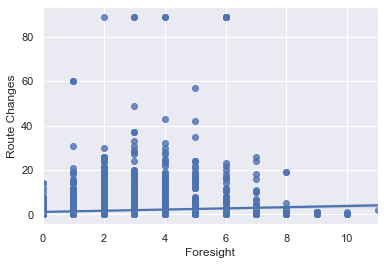

In [304]:
'''Foresight on route changes'''
import seaborn as sns
sns.set_theme(color_codes=True)
sns.regplot(x="Foresight", y="Route Changes", data=last_steps);


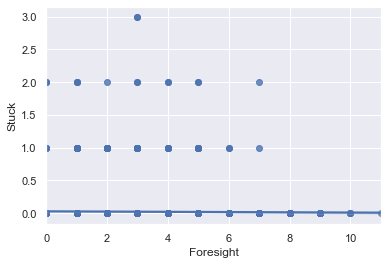

In [306]:
'''Foresight on route changes'''
import seaborn as sns
sns.set_theme(color_codes=True)
sns.regplot(x="Foresight", y="Stuck", data=last_steps);

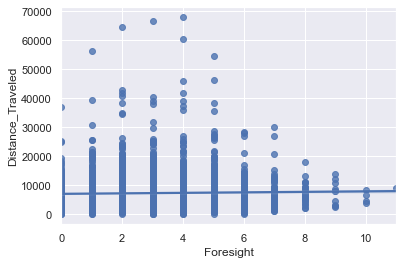

In [313]:
'''Foresight on route changes'''
import seaborn as sns
sns.set_theme(color_codes=True)
sns.regplot(x="Foresight", y="Distance_Traveled", data=last_steps);

# single_run_all

In [321]:
last_steps.index

MultiIndex([( 'Open', 44500),
            ( 'Open', 44501),
            ( 'Open', 44502),
            ( 'Open', 44503),
            ( 'Open', 44504),
            ( 'Open', 44505),
            ( 'Open', 44506),
            ( 'Open', 44507),
            ( 'Open', 44508),
            ( 'Open', 44509),
            ...
            ('Total', 44990),
            ('Total', 44991),
            ('Total', 44992),
            ('Total', 44993),
            ('Total', 44994),
            ('Total', 44995),
            ('Total', 44996),
            ('Total', 44997),
            ('Total', 44998),
            ('Total', 44999)],
           length=4000)

Text(0.5, 1.0, 'Distance travelled under different blockages (total)')

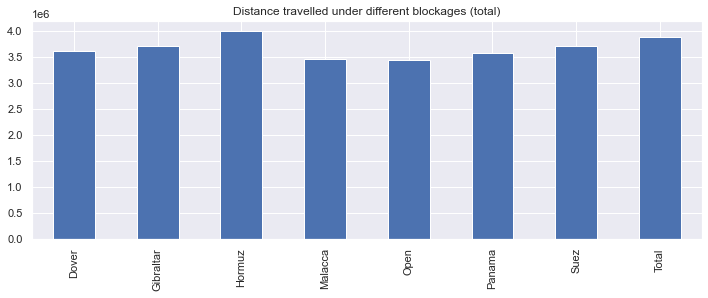

In [350]:
total_distances = last_steps.groupby(level = 0)["Distance_Traveled"].sum()
total_distances.plot(kind = "bar", figsize = (12,4))
plt.title("Distance travelled under different blockages (total)")

Text(0.5, 1.0, 'Distance travelled under different blockages (normalised)')

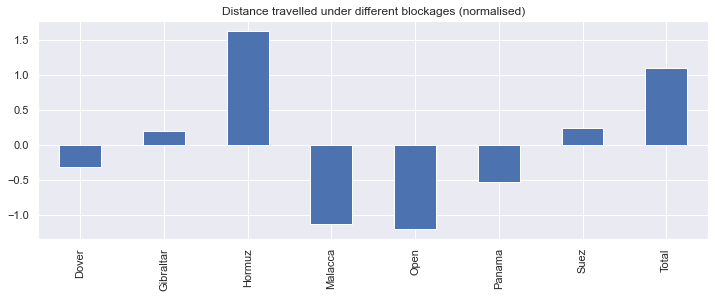

In [351]:
normalised = (total_distances - total_distances.mean()) / total_distances.std()
normalised.plot(kind = "bar", figsize = (12,4))
plt.title("Distance travelled under different blockages (normalised)")

In [353]:
total_distances["Open"]

3432674.639999998

Text(0.5, 1.0, "Distance travelled under different blockages (centered on 'Open')")

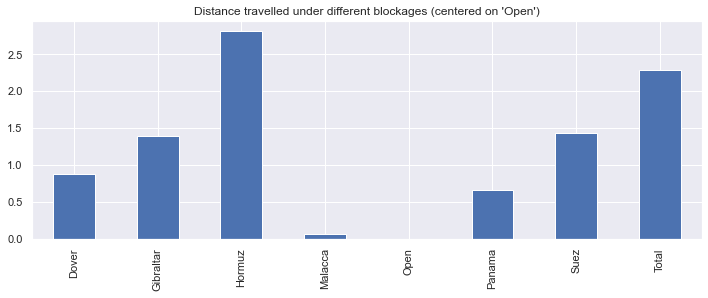

In [355]:
centered = (total_distances - total_distances["Open"])/ total_distances.std()
centered.plot(kind = "bar", figsize = (12,4))
plt.title("Distance travelled under different blockages (centered on 'Open')")

Text(0.5, 1.0, 'Number of stuck ships under different blockages (total)')

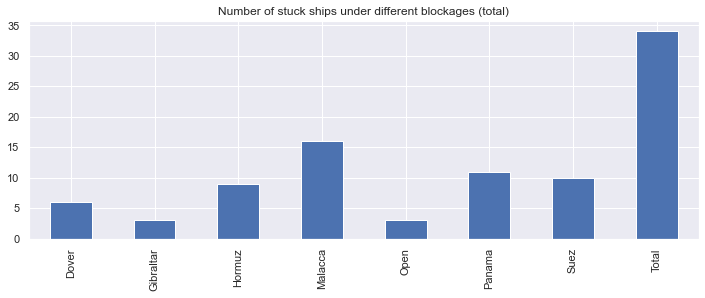

In [358]:
total_stucks = last_steps.groupby(level = 0)["Stuck"].sum()
total_stucks.plot(kind = "bar", figsize = (12,4))
plt.title("Number of stuck ships under different blockages (total)")

Text(0.5, 1.0, 'Route Changes under different blockages (total)')

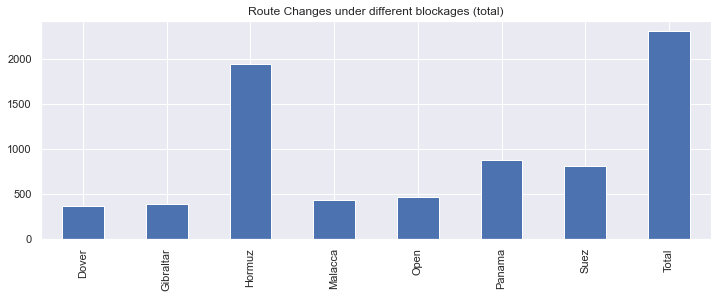

In [360]:
total_route_cng = last_steps.groupby(level = 0)["Route Changes"].sum()
total_route_cng.plot(kind = "bar", figsize = (12,4))
plt.title("Route Changes under different blockages (total)")

Text(0.5, 1.0, 'Destination not reachable under different blockages (total)')

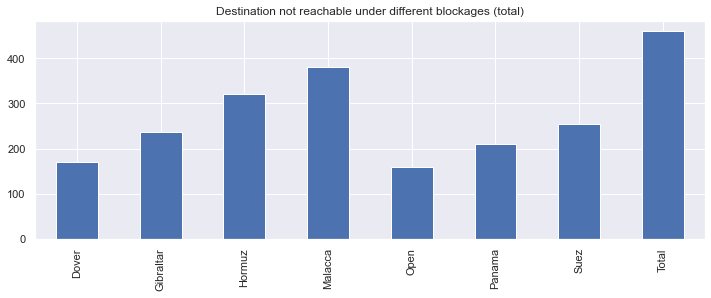

In [363]:
total_dest_not_reached = last_steps.groupby(level = 0)["Destination not reachable"].sum()
total_dest_not_reached.plot(kind = "bar", figsize = (12,4))
plt.title("Destination not reachable under different blockages (total)")

Text(0.5, 1.0, "Number of completed trips under different blockages (centered on 'Open')")

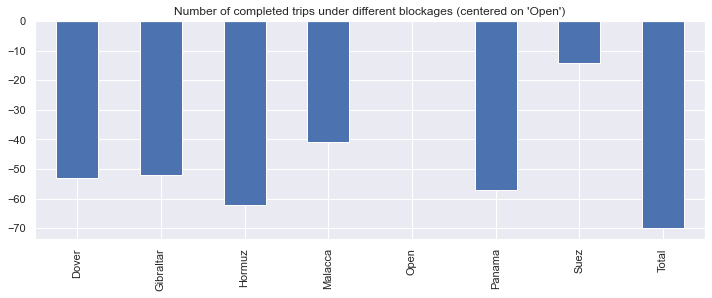

In [367]:
total_complete = last_steps.groupby(level = 0)["Complete"].sum() - last_steps.groupby(level = 0)["Complete"].sum() ["Open"]
total_complete.plot(kind = "bar", figsize = (12,4))
plt.title("Number of completed trips under different blockages (centered on 'Open')")

Text(0.5, 1.0, 'Ship statistics by type, under different blockages')

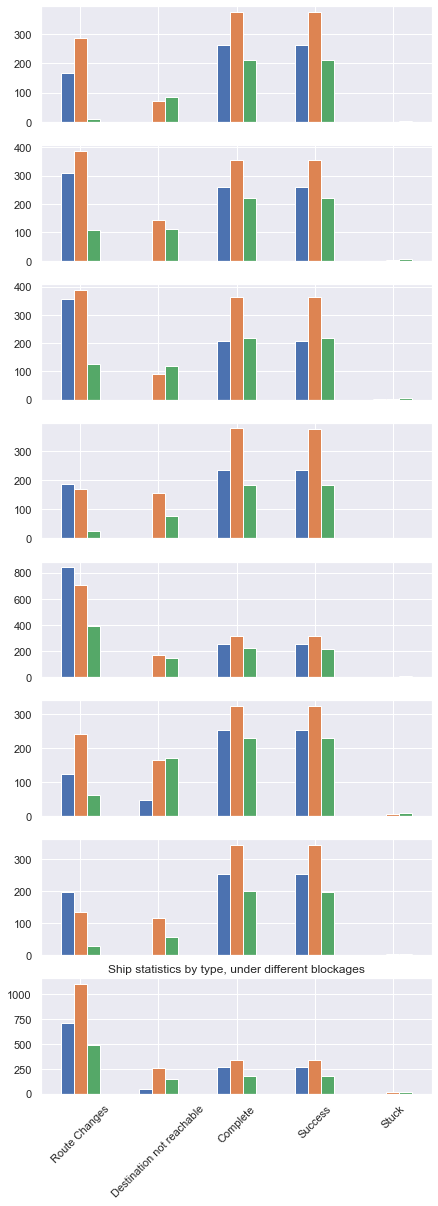

In [369]:
f, a = plt.subplots(8,1, figsize = (7,20), sharex = True, squeeze = False)
# plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )
for ax, code in zip(a.flat, types.index.levels[0]): 
    types.xs(code).plot(kind='bar', ax=ax)
    ax.get_legend().remove()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Ship statistics by type, under different blockages")

<ipython-input-16-5527964e7988>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run_none.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().diff(periods=1).plot(ax=ax)


<AxesSubplot:xlabel='Step'>

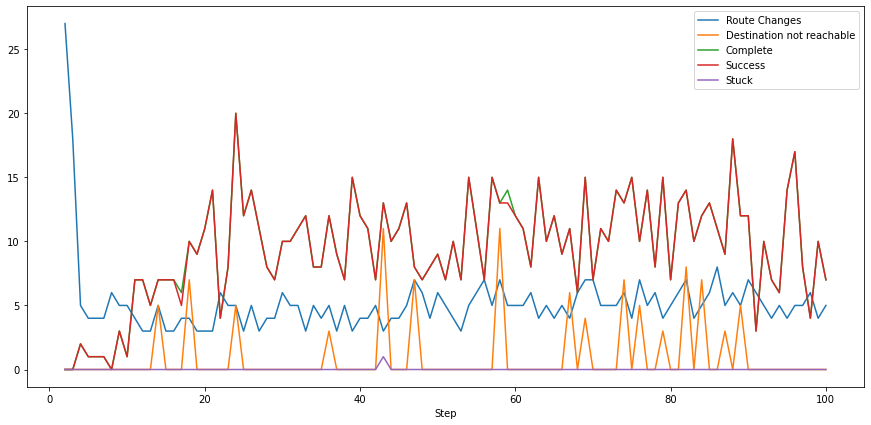

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
single_run_none.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().diff(periods=1).plot(ax=ax)

In [206]:
type_single= single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()
type_single

<ipython-input-206-0dea632d2f90>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_single= single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()


,Route Changes,Destination not reachable,Complete,Success,Stuck
Type,,,,,
['Large'],179,0,291,291,0
['Normal'],324,71,418,418,0
['Small'],9,87,227,225,3


<ipython-input-189-c92c5f5b0b71>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().plot(ax=ax)


<AxesSubplot:title={'center':'Ship statistics (std over time)'}, xlabel='Step'>

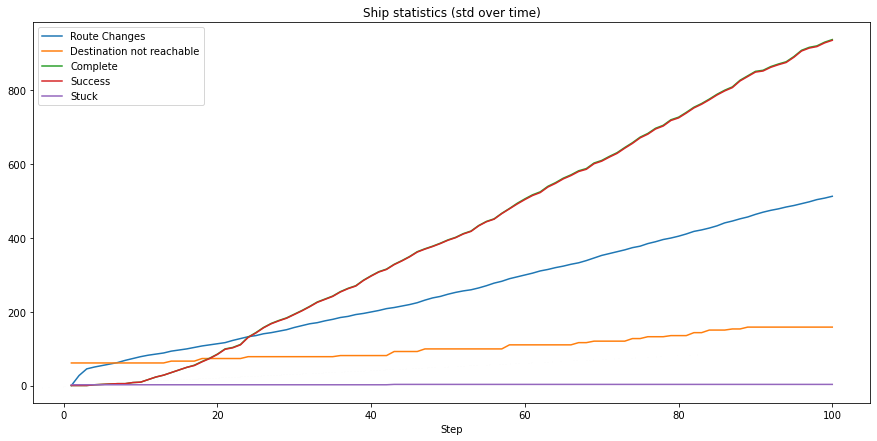

In [189]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Ship statistics (std over time)")
single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().plot(ax=ax)

In [48]:
grouped = single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()

<ipython-input-48-68c0fbfa5808>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()


,Route Changes,Destination not reachable,Complete,Success,Stuck
Type,,,,,
['Large'],179,0,291,291,0
['Normal'],324,71,418,418,0
['Small'],9,87,227,225,3


<ipython-input-75-f699c4d570bf>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().plot.bar(ax = axs, subplots = True)


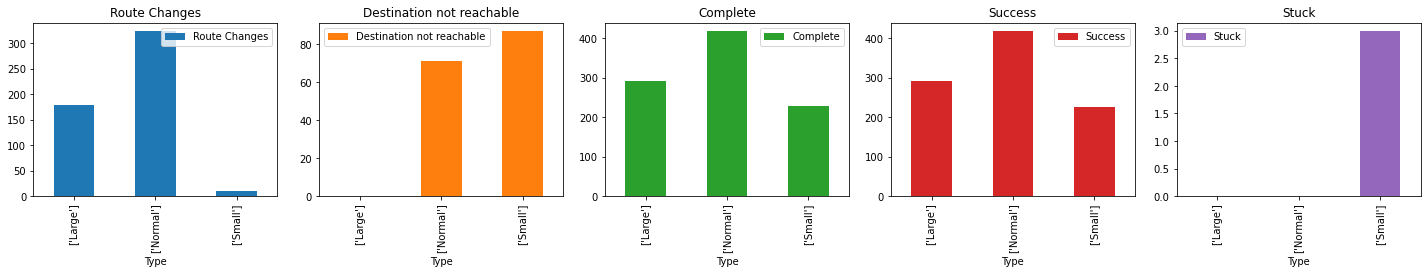

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize = (20,3))
fig.tight_layout()

single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().plot.bar(ax = axs, subplots = True)
plt.show()

<ipython-input-81-cea5623975d6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success"].sum().diff(periods=1).plot(ax=ax)


<AxesSubplot:title={'center':'Ship statistics (first difference)'}, xlabel='Step'>

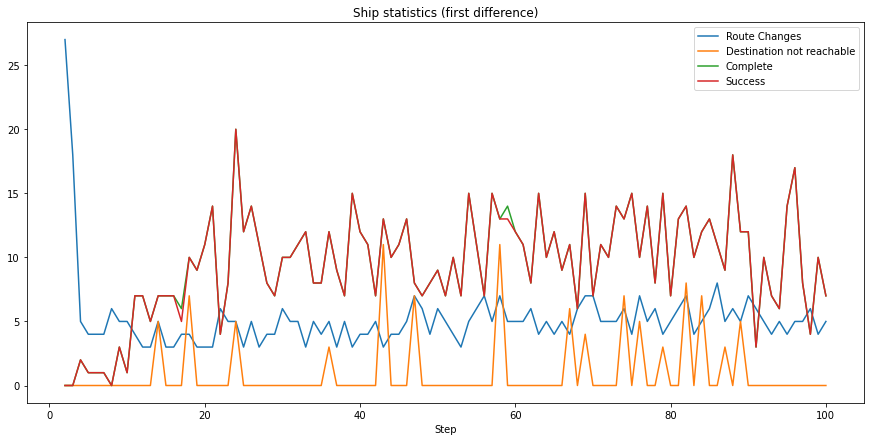

In [81]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Ship statistics (first difference)")
single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success"].sum().diff(periods=1).plot(ax=ax)

In [176]:
mean_vals = single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success"].sum().diff(periods=1).mean()
x = single_run.groupby("Step")["Complete"].sum().diff(periods=1).values[1:].astype(int) #data

<ipython-input-176-644979d585a0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_vals = single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success"].sum().diff(periods=1).mean()


In [184]:
mean_vals

Route Changes                5.171717
Destination not reachable    0.979798
Complete                     9.454545
Success                      9.434343
dtype: float64

In [185]:
xs = [(np.random.choice(x, size=x.shape, replace=True)) for i in range(1000)] #bootstrap sample
exp = [np.random.poisson(mean_vals[2],99) for i in range(1000)] #Posssion data

Text(0.5, 1.0, 'Histogram of complete routes')

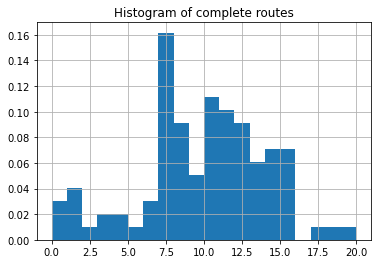

In [150]:

single_run.groupby("Step")["Complete"].sum().diff(periods=1)[1:].hist(density=True, bins = 20)
plt.title("Histogram of complete routes")

In [187]:
from scipy.stats import chisquare

print("The 'complete' statistic comes from the Poisson distribution with lamda =",x.mean())
print( chisquare(xs, f_exp=exp)[1]>=0.01)


The 'complete' statistic comes from the Poisson distribution with lamda = 9.454545454545455
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
<ipython-input-187-9758082f7b49>:4: RuntimeWarning: invalid value encountered in greater_equal
  print( chisquare(xs, f_exp=exp)[1]>=0.01)
